In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17438610474636157593
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5769199616
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3158053420178252352
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

Equivalent to np.ones(shape=(2, 1))

In [4]:
x = tf.ones(shape=(2, 1)) 
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


Equivalent to np.zeros(shape=(2, 1))

In [5]:
x = tf.zeros(shape=(2, 1)) 
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [6]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[1.7839684 ]
 [0.29688442]
 [0.45110244]], shape=(3, 1), dtype=float32)


In [7]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.2851076 ]
 [0.6798984 ]
 [0.07357621]], shape=(3, 1), dtype=float32)


A significant difference between NumPy arrays and TensorFlow tensors is that TensorFlow tensors aren’t assignable: they’re constant.

In [8]:
import numpy as np
x = np.ones(shape=(2, 2))
print(x)
x[0, 0] = 0.
x

[[1. 1.]
 [1. 1.]]


array([[0., 1.],
       [1., 1.]])

In [11]:
x = tf.ones(shape=(2, 2))
print(x)
x[0, 0] = 0.
x

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

Creating a TensorFlow variable

In [12]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.6301042 ],
       [0.8386721 ],
       [0.27026552]], dtype=float32)>


In [13]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [14]:
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [15]:
v.assign_add(tf.ones((3, 1)))
print(v)
v.assign_sub(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [20]:
a = tf.random.uniform(shape=(2, 2),minval=0,maxval=1)
#a = tf.ones((2, 2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b+c
print(d)
e = tf.matmul(a,b) # Take the product of two tensors
print(e) 
e*=d  # Multiply two tensors (element-wise).
print(e)

tf.Tensor(
[[0.27494192 0.2424798 ]
 [0.6720325  0.47352672]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.07559306 0.05879645]
 [0.45162764 0.22422755]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.52434903 0.49242237]
 [0.8197759  0.68813276]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.5999421 0.5512188]
 [1.2714036 0.9123603]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.13029428 0.07053626]
 [0.26465875 0.14569086]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.07816902 0.03888091]
 [0.33648807 0.13292256]], shape=(2, 2), dtype=float32)


In [24]:
input_var = tf.Variable(initial_value=3.) 
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

So far, you’ve only seen the case where the input tensors in tape.gradient() were TensorFlow variables. It’s actually possible for these inputs to be any arbitrary tensor. However, only trainable variables are tracked by default. With a constant tensor, you’d have to manually mark it as being tracked by calling tape.watch() on it.

In [23]:
input_const = tf.constant(3.) 
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [26]:
time = tf.Variable(0.) 
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2 
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

In [27]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [17]:
def generate_inputs(num_samples_per_class=1000):
    negative_samples = np.random.multivariate_normal(mean=[0, 3],cov=[[1, 0.5],[0.5, 1]],size=num_samples_per_class)
    positive_samples = np.random.multivariate_normal(mean=[3, 0],cov=[[1, 0.5],[0.5, 1]],size=num_samples_per_class) 
    inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
    targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
    return(inputs,targets)

In [18]:
inputs,targets = generate_inputs()

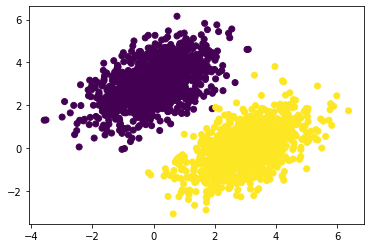

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [31]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [32]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [33]:
def square_loss(targets, predictions):
   per_sample_losses = tf.square(targets - predictions)
   return tf.reduce_mean(per_sample_losses)

In [34]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [37]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0250
Loss at step 1: 0.0250
Loss at step 2: 0.0250
Loss at step 3: 0.0250
Loss at step 4: 0.0250
Loss at step 5: 0.0249
Loss at step 6: 0.0249
Loss at step 7: 0.0249
Loss at step 8: 0.0249
Loss at step 9: 0.0249
Loss at step 10: 0.0249
Loss at step 11: 0.0249
Loss at step 12: 0.0249
Loss at step 13: 0.0249
Loss at step 14: 0.0249
Loss at step 15: 0.0249
Loss at step 16: 0.0249
Loss at step 17: 0.0249
Loss at step 18: 0.0249
Loss at step 19: 0.0249
Loss at step 20: 0.0249
Loss at step 21: 0.0249
Loss at step 22: 0.0249
Loss at step 23: 0.0249
Loss at step 24: 0.0249
Loss at step 25: 0.0248
Loss at step 26: 0.0248
Loss at step 27: 0.0248
Loss at step 28: 0.0248
Loss at step 29: 0.0248
Loss at step 30: 0.0248
Loss at step 31: 0.0248
Loss at step 32: 0.0248
Loss at step 33: 0.0248
Loss at step 34: 0.0248
Loss at step 35: 0.0248
Loss at step 36: 0.0248
Loss at step 37: 0.0248
Loss at step 38: 0.0248
Loss at step 39: 0.0248


In [38]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [10]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

NameError: name 'W' is not defined

In [4]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer): #All Keras layers inherit from the base Layer class.
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
  
    def build(self, input_shape): #Weight creation takes place in the build() method.
        input_dim = input_shape[-1]
#add_weight() is a shortcut method for creating weights. 
#It is also possible to create standalone variables and assign them as layer attributes, 
#like self.W = tf.Variable(tf.random.uniform(w_shape)).
        self.W = self.add_weight(shape=(input_dim, self.units), 
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
  
    def call(self, inputs):#We define the forward pass computation in the call() method.
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

Once instantiated, a layer like this can be used just like a function, taking as input a TensorFlow tensor:

In [5]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In SimpleDense, we no longer create weights in the constructor like in the NaiveDense example; instead, we create them in a dedicated state-creation method, build(), which receives as an argument the first input shape seen by the layer. The build() method is called automatically the first time the layer is called (via its __call__() method). In fact, that’s why we defined the computation in a separate call() method rather than in the __call__() method directly

Note that automatic shape inference is not the only thing that the Layer class’s __call__() method handles. It takes care of many more things, in particular routing between eager and graph execution , and input masking. For now, just remember: when implementing your own layers, put the forward pass in the call() method.

In [6]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

NameError: name 'model' is not defined

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=my_custom_loss,
              metrics=[my_custom_metric_1, my_custom_metric_2])

In [14]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])
  
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
 
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.3276 - binary_accuracy: 0.9643 - val_loss: 0.3852 - val_binary_accuracy: 0.6433
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0765 - binary_accuracy: 0.9500 - val_loss: 0.0785 - val_binary_accuracy: 0.9717
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0782 - binary_accuracy: 0.9521 - val_loss: 0.0355 - val_binary_accuracy: 0.9950
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0702 - binary_accuracy: 0.9614 - val_loss: 0.0998 - val_binary_accuracy: 0.9200
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0724 - binary_accuracy: 0.9629 - val_loss: 0.1544 - val_binary_accuracy: 0.8233


In [15]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 3ms/step - loss: 0.1544 - binary_accuracy: 0.8233


Once you’ve trained your model, you’re going to want to use it to make predictions on new data. This is called inference. To do this, a naive approach would simply be to __call__() the model

In [63]:
new_inputs,new_targets=generate_inputs(num_samples_per_class=200000)
new_inputs.shape

(400000, 2)

In [64]:
from time import time
t1 = time()
predictions = model(new_inputs)
t2 = time()
exec_time = t2 - t1
print("It took {} seconds to calculate the predictions.".format(exec_time))

It took 0.002000093460083008 seconds to calculate the predictions.


However, this will process all inputs in new_inputs at once, which may not be feasible if you’re looking at a lot of data (in particular, it may require more memory than your GPU has).A better way to do inference is to use the predict() method. It will iterate over the data in small batches and return a NumPy array of predictions. And unlike __call__(), it can also process TensorFlow Dataset objects.

In [65]:
t1 = time()
predictions = model.predict(new_inputs, batch_size=128)
t2 = time()
exec_time = t2 - t1
print("It took {} seconds to calculate the predictions.".format(exec_time))

3125/3125 [==============================] - 2s 631us/step
It took 2.390287399291992 seconds to calculate the predictions.
